In [1]:
print("hello world!")

hello world!


In [2]:
import os
import tarfile
from six.moves import urllib

# GET DATA

In [3]:
import opendatasets as od 
import zipfile

DOWNLOAD_ROOT = "https://www.kaggle.com/lgmoneda/cartola-fc-brasil-scouts"
SCOUTS_PATH = os.path.join("datasets", "scouts")
SCOUTS_URL = DOWNLOAD_ROOT


def fetch_scouts_data(scouts_url=SCOUTS_URL, scouts_path=SCOUTS_PATH):
    if not os.path.isdir(scouts_path):
        os.makedirs(scouts_path)
    
    zip_path = os.path.join(scouts_path, "archive.zip")
    print(scouts_url)
    od.download(DOWNLOAD_ROOT, scouts_path)

#     scouts_zip = tarfile.open(zip_path)
#     scouts_zip.extractall(path=scouts_path)
#     scouts_zip.close()
    
fetch_scouts_data()

import pandas as pd

def load_scouts_data(scout_path=SCOUTS_PATH):
    csv_path = os.path.join(scout_path + "/cartola-fc-brasil-scouts", "jogadores.csv")
    print(csv_path)
    return pd.read_csv(csv_path)

https://www.kaggle.com/lgmoneda/cartola-fc-brasil-scouts
Skipping, found downloaded files in "datasets/scouts/cartola-fc-brasil-scouts" (use force=True to force download)


In [4]:
scouts = load_scouts_data()


datasets/scouts/cartola-fc-brasil-scouts/jogadores.csv


In [5]:
games_path = os.path.join(SCOUTS_PATH + "/cartola-fc-brasil-scouts", "jogos.csv")
games = pd.read_csv(games_path)
games.head()

,mandante,visitante,placar_mandante,placar_visitante,data,local,rodada,ano
0,Fortaleza,Athlético-PR,0.0,2.0,"SÁB, 08/08 19:00",Castelão (CE),1,2020
1,Coritiba,Internacional,0.0,1.0,"SÁB, 08/08 19:30",Couto Pereira,1,2020
2,Sport,Ceará,3.0,2.0,"SÁB, 08/08 21:00",Ilha do Retiro,1,2020
3,Botafogo,Bahia,NaN,NaN,"DOM, 09/08 11:00",JOGO ADIADO* (Partida não válida para a rodada),1,2020
4,Flamengo,Atlético-MG,0.0,1.0,"DOM, 09/08 16:00",Maracanã,1,2020


In [6]:
scouts_with_local = pd.merge(scouts,games,how='inner',left_on=['Clube', 'rodada', 'ano'],right_on=['mandante','rodada', 'ano'])
scouts_with_away =  pd.merge(scouts,games,how='inner',left_on=['Clube', 'rodada', 'ano'],right_on=['visitante','rodada', 'ano'])
scouts = pd.concat([scouts_with_local, scouts_with_away], ignore_index=True, sort=False)

# Looking at the data 

In [7]:
scouts.head()

,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,...,rodada,ano,RB,PE,mandante,visitante,placar_mandante,placar_visitante,data,local
0,Elton (ATA),Sport,14.21,1.0,15.60,15.60,10.21,NaN,2.0,NaN,...,1,2020,NaN,NaN,Sport,Ceará,3.0,2.0,"SÁB, 08/08 21:00",Ilha do Retiro
1,Jonatan Gomez (MEI),Sport,11.96,1.0,9.50,9.50,4.96,NaN,1.0,NaN,...,1,2020,NaN,NaN,Sport,Ceará,3.0,2.0,"SÁB, 08/08 21:00",Ilha do Retiro
2,Patric (LAT),Sport,7.46,1.0,5.30,5.30,2.46,1.0,NaN,1.0,...,1,2020,NaN,NaN,Sport,Ceará,3.0,2.0,"SÁB, 08/08 21:00",Ilha do Retiro
3,Daniel Paulista (TEC),Sport,4.65,1.0,4.42,4.42,2.65,NaN,NaN,NaN,...,1,2020,NaN,NaN,Sport,Ceará,3.0,2.0,"SÁB, 08/08 21:00",Ilha do Retiro
4,Sander (LAT),Sport,8.19,1.0,4.30,4.30,1.19,4.0,NaN,NaN,...,1,2020,NaN,NaN,Sport,Ceará,3.0,2.0,"SÁB, 08/08 21:00",Ilha do Retiro


In [8]:
scouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16404 entries, 0 to 16403
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nome              16404 non-null  object 
 1   Clube             16404 non-null  object 
 2   Preço             16404 non-null  float64
 3   J                 16404 non-null  float64
 4   Média             16404 non-null  float64
 5   Últ. Pont.        16404 non-null  float64
 6   Variação          16404 non-null  float64
 7   DS                6471 non-null   float64
 8   G                 6581 non-null   float64
 9   A                 5905 non-null   float64
 10  SG                5805 non-null   float64
 11  FS                13844 non-null  float64
 12  FF                11416 non-null  float64
 13  FD                10229 non-null  float64
 14  FT                2930 non-null   float64
 15  DD                1322 non-null   float64
 16  DP                412 non-null    float6

In [9]:
#criando attr posicao
scouts["Posicao"] = scouts["Nome"].apply(lambda x : pd.Series(x.split('(')))[1].str.replace(")","", regex=True)


In [10]:
scouts["Posicao"].value_counts()

MEI    5017
ATA    3143
ZAG    2795
LAT    2625
TEC    1438
GOL    1386
Name: Posicao, dtype: int64

In [11]:
def isLocal(row):
    if row['Clube'] == row['mandante']:
        val = 1
    else:
        val = 0
    return val

def isAway(row):
    if row['Clube'] == row['visitante']:
        val = 1
    else:
        val = 0
    return val

scouts['e_mandante'] = scouts.apply(isLocal, axis=1)
scouts['e_visitante'] = scouts.apply(isAway, axis=1)

In [12]:
scouts.describe()

,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,SG,FS,...,I,PI,rodada,ano,RB,PE,placar_mandante,placar_visitante,e_mandante,e_visitante
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,6471.000000,6581.000000,5905.000000,5805.000000,13844.000000,...,6010.000000,7065.000000,16404.000000,16404.000000,6830.000000,7530.000000,15876.000000,15876.000000,16404.000000,16404.000000
mean,7.325429,12.265301,3.073508,2.910665,0.064092,19.033071,2.587145,1.832854,4.222567,13.862251,...,3.028453,68.503185,19.512436,2019.480493,15.193997,22.650066,1.401109,1.003212,0.501280,0.498720
std,3.829021,8.327157,1.989410,4.019386,1.070262,16.761335,2.591994,1.275022,2.905781,14.040226,...,3.124587,62.432027,11.070877,0.499635,13.767498,19.194452,1.159901,0.998293,0.500014,0.500014
min,0.690000,0.000000,-7.200000,-10.700000,-7.380000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.480000,5.000000,1.880000,0.000000,-0.440000,6.000000,1.000000,1.000000,2.000000,4.000000,...,1.000000,23.000000,10.000000,2019.000000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000
50%,6.710000,11.000000,2.940000,1.900000,0.000000,14.000000,2.000000,1.000000,4.000000,9.000000,...,2.000000,50.000000,19.000000,2019.000000,11.000000,17.000000,1.000000,1.000000,1.000000,0.000000
75%,9.610000,18.000000,4.080000,4.900000,0.500000,27.000000,3.000000,2.000000,6.000000,19.000000,...,4.000000,94.000000,29.000000,2020.000000,21.000000,33.000000,2.000000,2.000000,1.000000,1.000000
max,26.220000,38.000000,22.700000,37.700000,14.520000,121.000000,25.000000,13.000000,15.000000,147.000000,...,24.000000,394.000000,38.000000,2020.000000,94.000000,123.000000,6.000000,5.000000,1.000000,1.000000


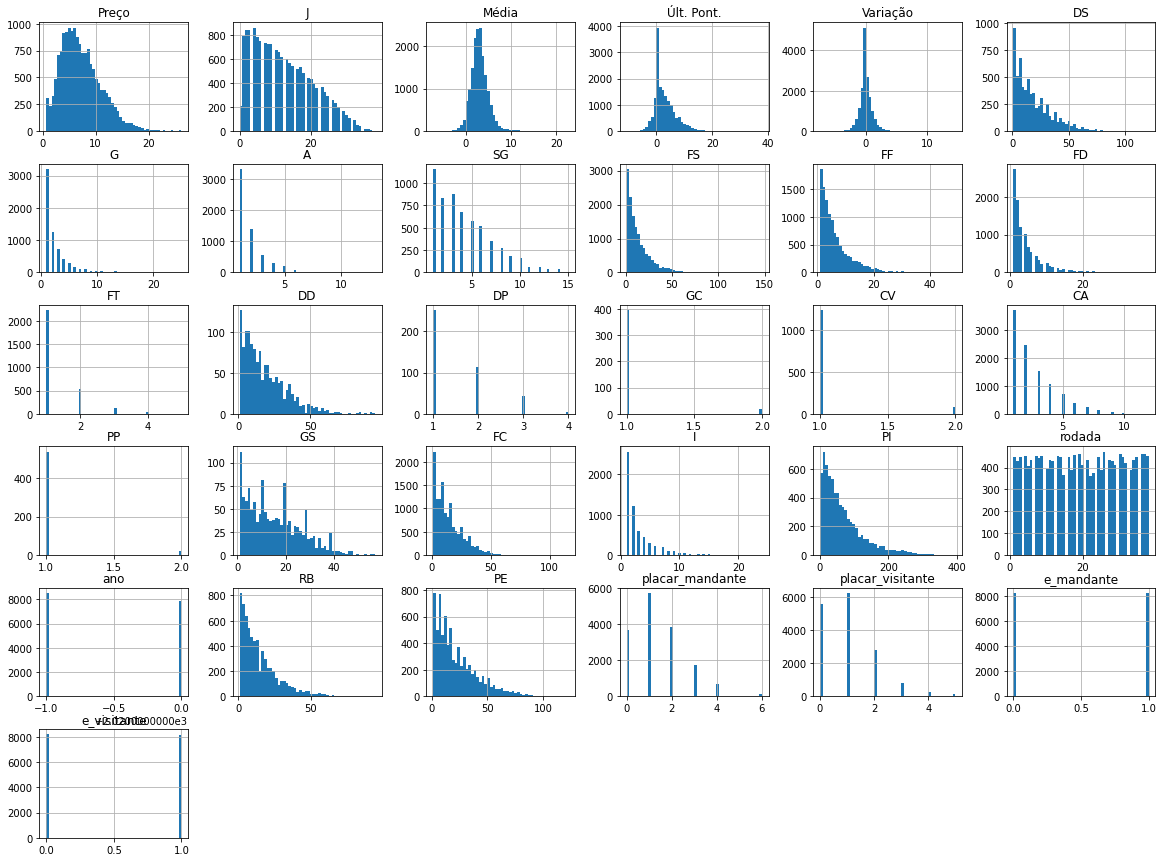

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
scouts.hist(bins=50, figsize=(20, 15))
plt.show()

In [14]:
import numpy as np 
np.sum((scouts["ano"] == 2020) & (scouts["rodada"] > 22))

#afim de dividir os conjuntos de teste e treino em 20% e 80% respec.
#observa-se que o número de linhas que satisfaz a condição é a partir da rodada 22
#OBS= total 16404 - 20% 3280

3313

In [15]:
#split in train and test data

train_set = scouts[(scouts["ano"] == 2019) | ((scouts["ano"] == 2020) & (scouts["rodada"] < 23))]
test_set = scouts[(scouts["ano"] == 2020) & (scouts["rodada"] > 22)]

# Discover and visualize data to gain insights

In [16]:
scouts = train_set.copy()

<AxesSubplot:xlabel='Preço', ylabel='Últ. Pont.'>

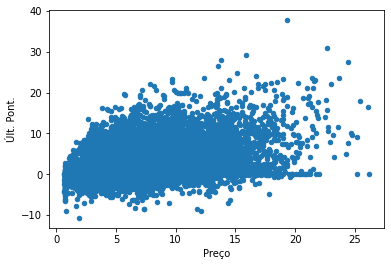

In [17]:
scouts.plot(kind="scatter", x="Preço", y="Últ. Pont.")

<AxesSubplot:xlabel='Preço', ylabel='Últ. Pont.'>

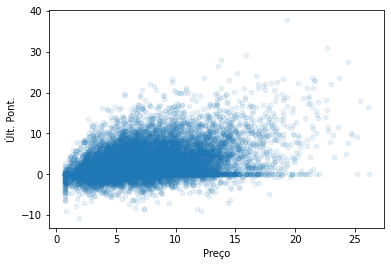

In [18]:
scouts.plot(kind="scatter", x="Preço", y="Últ. Pont.", alpha=0.1)

<AxesSubplot:xlabel='Preço', ylabel='Últ. Pont.'>

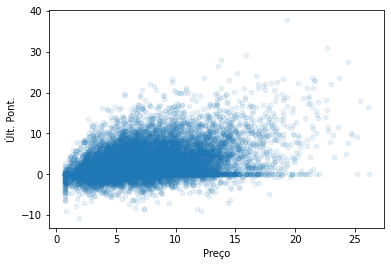

In [19]:
scouts.plot(kind="scatter", x="Preço", y="Últ. Pont.",alpha=0.1)

<AxesSubplot:xlabel='Média', ylabel='Últ. Pont.'>

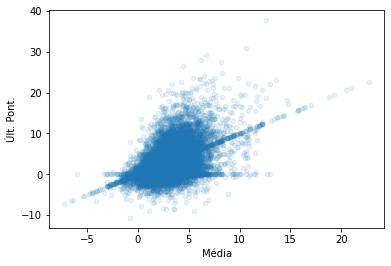

In [20]:
scouts.plot(kind="scatter", x="Média", y="Últ. Pont.", alpha=0.1,)

/home/carlos/.local/lib/python3.8/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<AxesSubplot:xlabel='Variação', ylabel='Últ. Pont.'>

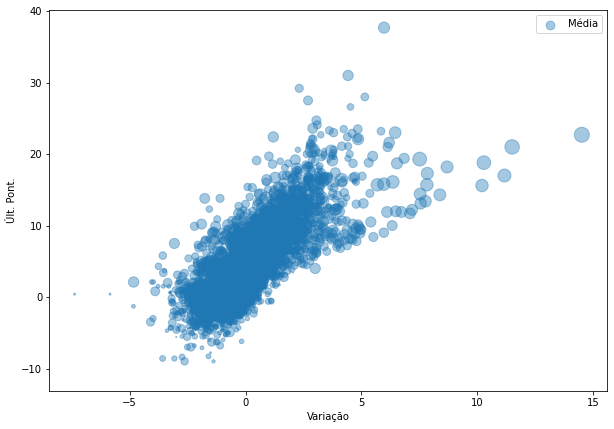

In [21]:
scouts.plot(kind="scatter", x="Variação", y="Últ. Pont.", alpha=0.4, s=scouts["Média"]/0.1, label ="Média", figsize=(10,7))

### Searching for correlations

In [22]:
corr_matrix = scouts.corr()

In [23]:
corr_matrix["Últ. Pont."].sort_values(ascending=False)

Últ. Pont.          1.000000
Variação            0.736462
Média               0.479507
Preço               0.363626
G                   0.157141
DP                  0.149756
FT                  0.120189
FD                  0.110644
A                   0.106988
FF                  0.106941
e_mandante          0.103193
DD                  0.100431
I                   0.091174
FS                  0.079453
J                   0.052013
SG                  0.049335
DS                  0.044129
RB                  0.040724
GS                  0.032720
GC                  0.031693
placar_mandante     0.027771
PI                  0.014039
CV                  0.012369
PE                  0.012350
rodada              0.010298
PP                  0.003684
FC                  0.001577
CA                 -0.011312
placar_visitante   -0.025624
ano                -0.057067
e_visitante        -0.103193
Name: Últ. Pont., dtype: float64

### trying new attr

In [24]:
scouts["A_por_jogo"]= scouts["A"] / scouts["J"]
scouts["SG_por_jogo"] = scouts["SG"] / scouts["J"]
scouts["DS_por_jogo"] = scouts["DS"] / scouts["J"]
scouts["DD_por_jogo"] = scouts["DD"] / scouts["J"]
scouts["G_por_jogo"] = scouts["DD"] / scouts["J"]

In [25]:
corr_matrix = scouts.corr()
corr_matrix["Últ. Pont."].sort_values(ascending=False)

Últ. Pont.          1.000000
Variação            0.736462
Média               0.479507
Preço               0.363626
DD_por_jogo         0.329000
G_por_jogo          0.329000
SG_por_jogo         0.204510
A_por_jogo          0.176706
G                   0.157141
DP                  0.149756
DS_por_jogo         0.124059
FT                  0.120189
FD                  0.110644
A                   0.106988
FF                  0.106941
e_mandante          0.103193
DD                  0.100431
I                   0.091174
FS                  0.079453
J                   0.052013
SG                  0.049335
DS                  0.044129
RB                  0.040724
GS                  0.032720
GC                  0.031693
placar_mandante     0.027771
PI                  0.014039
CV                  0.012369
PE                  0.012350
rodada              0.010298
PP                  0.003684
FC                  0.001577
CA                 -0.011312
placar_visitante   -0.025624
ano           

# Order data for AM algoritms

In [26]:
scouts = train_set.drop("Últ. Pont.", axis=1)
scouts_labels = train_set["Últ. Pont."].copy()
scouts_players_name = train_set["Nome"].copy()

### cleaning the data

In [27]:
scouts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13091 entries, 0 to 16403
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nome              13091 non-null  object 
 1   Clube             13091 non-null  object 
 2   Preço             13091 non-null  float64
 3   J                 13091 non-null  float64
 4   Média             13091 non-null  float64
 5   Variação          13091 non-null  float64
 6   DS                3607 non-null   float64
 7   G                 4894 non-null   float64
 8   A                 4246 non-null   float64
 9   SG                4460 non-null   float64
 10  FS                10877 non-null  float64
 11  FF                8819 non-null   float64
 12  FD                7854 non-null   float64
 13  FT                2052 non-null   float64
 14  DD                1062 non-null   float64
 15  DP                306 non-null    float64
 16  GC                265 non-null    float6

In [28]:
#remember there are three option here.

try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy='constant', fill_value=0)

In [29]:
scouts_num = scouts.drop("Posicao", axis=1).drop("Nome", axis=1).drop("Clube", axis=1).drop("placar_mandante", axis=1).drop("placar_visitante", axis=1).drop("mandante", axis=1).drop("visitante", axis=1).drop("data", axis=1).drop("local", axis=1)
scouts_num.head()

,Preço,J,Média,Variação,DS,G,A,SG,FS,FF,...,GS,FC,I,PI,rodada,ano,RB,PE,e_mandante,e_visitante
0,14.21,1.0,15.60,10.21,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,4.0,1,2020,NaN,NaN,1,0
1,11.96,1.0,9.50,4.96,NaN,1.0,NaN,NaN,3.0,1.0,...,NaN,1.0,NaN,3.0,1,2020,NaN,NaN,1,0
2,7.46,1.0,5.30,2.46,1.0,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,1.0,10.0,1,2020,NaN,NaN,1,0
3,4.65,1.0,4.42,2.65,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,2020,NaN,NaN,1,0
4,8.19,1.0,4.30,1.19,4.0,NaN,NaN,NaN,3.0,NaN,...,NaN,1.0,NaN,7.0,1,2020,NaN,NaN,1,0


In [30]:
imputer.fit(scouts_num)

SimpleImputer(fill_value=0, strategy='constant')

In [31]:
imputer.statistics_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [32]:
X = imputer.transform(scouts_num)

In [33]:
scouts_tr = pd.DataFrame(X, columns=scouts_num.columns)

In [34]:
scouts_tr.shape

(13091, 28)

### cat attr

In [35]:
scouts_cat = scouts[["Posicao"]]
scouts_cat.head(10)

,Posicao
0,ATA
1,MEI
2,LAT
3,TEC
4,LAT
5,MEI
6,GOL
7,ZAG
8,MEI
9,LAT


In [36]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
scouts_cat_1hot = cat_encoder.fit_transform(scouts_cat)
scouts_cat_1hot

<13091x6 sparse matrix of type '<class 'numpy.float64'>'
	with 13091 stored elements in Compressed Sparse Row format>

In [37]:
scouts_cat_1hot.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [38]:
cat_encoder.categories_

[array(['ATA', 'GOL', 'LAT', 'MEI', 'TEC', 'ZAG'], dtype=object)]

In [39]:
#transformer for trying new attr said before

from sklearn.base import BaseEstimator, TransformerMixin

DS_ix, G_ix, A_ix, SG_ix, FS_ix, FF_ix, FD_ix, FT_ix, DD_ix, DP_ix, GC_ix, CV_ix, CA_ix, CP_ix, GS_ix, FC_ix, I_ix, PI_ix, RB_ix, PE_ix, J_ix = 3, 4, 5,6,7 ,8,9, 10,11,12,13,14,15,16,17,18,19,20,21,22,23

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_median_values = True): # sem *args ou **kargs
        self.add_median_values = add_median_values
    def fit(self, X, y=None):
        return self 
    def transform(self, X, y=None):
        if self.add_median_values:
            DS_por_jogo = X[:, DS_ix] / X[:, J_ix]
            G_por_jogo = X[:, G_ix] / X[:, J_ix]
            A_por_jogo = X[:, A_ix] / X[:, J_ix]
            SG_por_jogo = X[:, SG_ix] / X[:, J_ix]
            FS_por_jogo = X[:, FS_ix] / X[:, J_ix]
            FF_por_jogo = X[:, FF_ix] / X[:, J_ix]
            FD_por_jogo = X[:, FD_ix] / X[:, J_ix]
            FT_por_jogo = X[:, FT_ix] / X[:, J_ix]
            DD_por_jogo = X[:, DD_ix] / X[:, J_ix]
            DP_por_jogo = X[:, DP_ix] / X[:, J_ix]
            GC_por_jogo = X[:, GC_ix] / X[:, J_ix]
            CV_por_jogo = X[:, CV_ix] / X[:, J_ix]
            CA_por_jogo = X[:, CA_ix] / X[:, J_ix]
            CP_por_jogo = X[:, CP_ix] / X[:, J_ix]
            GS_por_jogo = X[:, GS_ix] / X[:, J_ix]
            FC_por_jogo = X[:, FC_ix] / X[:, J_ix]
            I_por_jogo = X[:, I_ix] / X[:, J_ix]
            PI_por_jogo = X[:, PI_ix] / X[:, J_ix]
            RB_por_jogo = X[:, RB_ix] / X[:, J_ix]
            PE_por_jogo = X[:, PE_ix] / X[:, J_ix]
            return np.c_[X, DS_por_jogo, G_por_jogo, A_por_jogo, SG_por_jogo, FS_por_jogo, FF_por_jogo, FD_por_jogo,
                        FT_por_jogo, DD_por_jogo, DP_por_jogo, GC_por_jogo, CV_por_jogo, CA_por_jogo, CP_por_jogo, 
                        GS_por_jogo, FC_por_jogo, I_por_jogo, PI_por_jogo, RB_por_jogo,PE_por_jogo]
        else:
            return np.c_[X]

attr_adder = CombinedAttributesAdder(add_median_values=False)
scouts_extra_attribs = attr_adder.transform(scouts.values)

### pipelines

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

scouts_num_tr = num_pipeline.fit_transform(scouts_num)

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataframeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        print(attribute_names)
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    

In [42]:
num_attribs = list(scouts_num)
cat_attribs = ["Posicao"]
print(num_attribs)

num_pipeline = Pipeline([
    ('selector', DataframeSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataframeSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

['Preço', 'J', 'Média', 'Variação', 'DS', 'G', 'A', 'SG', 'FS', 'FF', 'FD', 'FT', 'DD', 'DP', 'GC', 'CV', 'CA', 'PP', 'GS', 'FC', 'I', 'PI', 'rodada', 'ano', 'RB', 'PE', 'e_mandante', 'e_visitante']
['Preço', 'J', 'Média', 'Variação', 'DS', 'G', 'A', 'SG', 'FS', 'FF', 'FD', 'FT', 'DD', 'DP', 'GC', 'CV', 'CA', 'PP', 'GS', 'FC', 'I', 'PI', 'rodada', 'ano', 'RB', 'PE', 'e_mandante', 'e_visitante']
['Posicao']


In [43]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [44]:
scouts_prepared = full_pipeline.fit_transform(scouts)
scouts_prepared

array([[ 1.74433173e+00, -1.24573642e+00,  5.94411877e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.16410299e+00, -1.24573642e+00,  3.03954273e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.64549459e-03, -1.24573642e+00,  1.03967070e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.21354547e+00,  1.94531565e+00, -9.55439734e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-9.63402415e-01,  1.05182107e+00, -1.06495654e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.26254257e+00, -9.69576709e-02, -1.19351974e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

# SELECT A MODEL AND TRAIN 😎

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(scouts_prepared, scouts_labels)

LinearRegression()

In [46]:
some_data = scouts.iloc[:10]
some_labels = scouts_labels[:10]
some_players_name = scouts_players_name[:10]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))
print('Player:', list(some_players_name))

Predictions: [30.20846558 15.97515869  8.79370117  8.94567871  5.6506958   5.79412842
  4.27987671  1.96951294  1.11990356  3.10559082]
Labels: [15.6, 9.5, 5.3, 4.42, 4.3, 3.3, 2.5, 1.9, 1.8, 1.4]
Player: ['Elton (ATA)', 'Jonatan Gomez (MEI)', 'Patric (LAT)', 'Daniel Paulista (TEC)', 'Sander (LAT)', 'Betinho (MEI)', 'Maílson (GOL)', 'Iago Maidana (ZAG)', 'Willian Farias (MEI)', 'Rafael Luiz (LAT)']


In [47]:
# measure the RMSE
from sklearn.metrics import mean_squared_error

scouts_predictions = lin_reg.predict(scouts_prepared)
lin_mse = mean_squared_error(scouts_labels, scouts_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.420435359961579

In [48]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(scouts_prepared, scouts_labels)

DecisionTreeRegressor()

In [49]:
scouts_predictions = tree_reg.predict(scouts_prepared)
tree_mse = mean_squared_error(scouts_labels, scouts_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

2.0381105047920267e-17

## Evaluate with cross validation

In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, scouts_prepared, scouts_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [51]:
def display_scores(scores):
    print("Scores", scores)
    print("Mean", scores.mean())
    print("Standard deviation", scores.std())
display_scores(tree_rmse_scores)    

Scores [2.07258368 2.44292765 2.26030948 2.80292212 3.22372932 1.9575098
 2.479386   2.15495811 2.63184541 2.9858712 ]
Mean 2.5012042760701427
Standard deviation 0.39066013785399206


In [52]:
### see random forest algorithm

In [53]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(scouts_prepared, scouts_labels)

scouts_predictions = forest_reg.predict(scouts_prepared)
forest_mse = mean_squared_error(scouts_labels, scouts_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

0.6676425784955006


In [54]:
#with cross validation
forest_scores = cross_val_score(forest_reg, scouts_prepared, scouts_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores [1.43493843 1.77595376 1.63331345 1.96036289 2.27062902 1.27191293
 1.68962726 1.49659915 1.88173382 2.16598723]
Mean 1.7581057933927084
Standard deviation 0.302494050919434


In [55]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(scouts_prepared, scouts_labels)


scouts_predictions = xgb_reg.predict(scouts_prepared)
xgb_mse = mean_squared_error(scouts_labels, scouts_predictions)
xgb_rmse = np.sqrt(xgb_mse)
print(xgb_rmse)

1.0047433545205005


In [56]:
#with cross validation
xgb_scores = cross_val_score(xgb_reg, scouts_prepared, scouts_labels, scoring="neg_mean_squared_error", cv=10)
xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(xgb_rmse_scores)

Scores [1.46387597 1.82092233 1.60739033 1.94872286 2.24955088 1.28220734
 1.73943472 1.46507245 1.81509511 2.11617097]
Mean 1.7508442972273872
Standard deviation 0.2889140086213353


# Adjustment models with grid search

# Linear regression

In [57]:
from sklearn.model_selection import GridSearchCV

# param_grid = [
#     {"n_estimators": [3, 10, 30], "max_features":[2,4,6,8]},
#     {"bootstrap": [False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
# ]
space = dict()
space['fit_intercept'] = [True, False]
space['n_jobs'] = [None,1, 3, 30]
space['normalize'] = [True, False]
space['positive'] = [True, False]
space['copy_X'] = [True, False]

lin_reg = LinearRegression()
grid_search = GridSearchCV(lin_reg, space, cv=5, scoring="neg_mean_squared_error")
print(grid_search.estimator.get_params().keys())

result = grid_search.fit(scouts_prepared, scouts_labels)

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])


In [58]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -6.387349504240483
Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


In [59]:
final_model = grid_search.best_estimator_
print(final_model)
print(grid_search.best_estimator_)

X_test = test_set.drop("Últ. Pont.", axis=1)
Y_test = test_set["Últ. Pont."].copy()
players_name = test_set["Nome"].copy()
rounds = test_set["rodada"].copy()
prices = test_set["Preço"].copy()


X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

LinearRegression()
LinearRegression()


2.759181238772602

In [60]:
import pandas as pd  
  
# assign data of lists.  
data = {'Player': players_name,'Predictions': final_predictions, 'Labels': Y_test, 'Round': rounds, 'Prices': prices}  
  
# Create DataFrame  
lin_reg_result = pd.DataFrame(data)  
  
# Print the output.  
print(lin_reg_result)  

                     Player  Predictions  Labels  Round  Prices
2287          Marinho (ATA)    17.905060   18.20     23   25.81
2288      John Victor (GOL)     0.573669   -4.40     23    0.76
2289   Felipe Jonatan (LAT)     0.744843   -0.90     23   11.08
2290             Cuca (TEC)     3.528778    4.37     23   10.89
2291     Diego Pituca (MEI)     0.426331   -0.20     23    7.04
...                     ...          ...     ...    ...     ...
12140    Arthur Gomes (ATA)     2.427307    1.60     38    3.71
12141       Jean Mota (MEI)    -0.963043    0.00     38    3.71
12142          Sandry (MEI)    -0.746277   -0.40     38    1.54
12143     Luiz Felipe (ZAG)     2.100159   -0.20     38    3.07
12144          Ângelo (ATA)     0.988861    0.40     38    0.79

[3313 rows x 5 columns]


In [61]:
RESULTS_PATH = os.path.join("result", "files")
def saveResult(df, file_name):
    if not os.path.isdir(RESULTS_PATH):
        os.makedirs(RESULTS_PATH)
    df.to_csv(RESULTS_PATH + "/" + file_name, encoding='utf-8')
    
saveResult(lin_reg_result, "linear-regression")

In [62]:
lin_reg_result.sort_values(['Round', 'Predictions'], ascending=[True, False]).head(50)

,Player,Predictions,Labels,Round,Prices
2287,Marinho (ATA),17.905060,18.20,23,25.81
10516,Vina (MEI),10.639160,13.80,23,11.78
10528,Luciano (ATA),9.381744,17.90,23,11.61
2334,Jean (GOL),8.808533,15.50,23,11.04
10518,Cléber (ATA),8.625580,12.20,23,12.44
2314,Rony (ATA),8.525085,17.20,23,11.77
10532,Arboleda (ZAG),8.319397,14.30,23,10.42
2309,Viña (LAT),8.285431,14.90,23,10.45
2297,Calegari (LAT),8.009674,14.50,23,7.02
2310,Abel Ferreira (TEC),7.317139,8.62,23,12.48


# Random Forest

In [ ]:

param_grid = [
     {'n_estimators': [5, 10, 50, 500], 'max_features': [2, 4, 6, 8, 16, 32]},
     {'bootstrap': [False], 'n_estimators': [5, 10, 50], 'max_features': [2, 3, 4, 8, 16, 32]},
]


forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring='neg_mean_squared_error')

grid_search.fit(scouts_prepared, scouts_labels)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [88]:
final_model = grid_search.best_estimator_
print(final_model)
print(grid_search.best_estimator_)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.0933289121340524

In [90]:
import pandas as pd  
  
# assign data of lists.  
data = {'Player': players_name,'Predictions': final_predictions, 'Labels': Y_test, 'Round': rounds,'Prices': prices}  
  
# Create DataFrame  
random_forest_reg_result = pd.DataFrame(data)  
  
# Print the output.  
print(lin_reg_result)  

                     Player  Predictions  Labels  Round
2287          Marinho (ATA)    17.905060   18.20     23
2288      John Victor (GOL)     0.573669   -4.40     23
2289   Felipe Jonatan (LAT)     0.744843   -0.90     23
2290             Cuca (TEC)     3.528778    4.37     23
2291     Diego Pituca (MEI)     0.426331   -0.20     23
...                     ...          ...     ...    ...
12140    Arthur Gomes (ATA)     2.427307    1.60     38
12141       Jean Mota (MEI)    -0.963043    0.00     38
12142          Sandry (MEI)    -0.746277   -0.40     38
12143     Luiz Felipe (ZAG)     2.100159   -0.20     38
12144          Ângelo (ATA)     0.988861    0.40     38

[3313 rows x 4 columns]


In [91]:
saveResult(random_forest_reg_result, "random-forest")

# XGBoost

In [96]:
param_grid = { 'learning_rate' : [0.05, 0.1],
               'n_estimators' : [5, 10, 500],
               'max_depth': [3, 10, 30],
               'min_child_weight': [3, 10, 30],
               'gamma':[0.4, 0.8],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1, 5, 50],
               'reg_alpha':[1e-5, 0.5e-5]
             }  

xgb_reg = XGBRegressor()

grid_search = GridSearchCV(xgb_reg, param_grid=[], cv = 5, scoring='neg_mean_squared_error')
print(grid_search.estimator.get_params().keys())
grid_search.fit(scouts_prepared, scouts_labels)

dict_keys(['objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])


ValueError: No fits were performed. Was the CV iterator empty? Were there no candidates?

In [106]:
grid_search.best_params_

{'max_features': 16, 'n_estimators': 500}

In [103]:
final_model = grid_search.best_estimator_
# XGBRegressor(colsample_bytree= 0.8, gamma= 0.4, learning_rate= 0.05, max_depth= 10, min_child_weight= 30, n_estimators= 500, reg_alpha= 1e-05, scale_pos_weight= 5, subsample= 0.8)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

NotFittedError: need to call fit or load_model beforehand

In [105]:
import pandas as pd  
  
# assign data of lists.  
data = {'Player': players_name,'Predictions': final_predictions, 'Labels': Y_test, 'Round': rounds,'Prices': prices}  
  
# Create DataFrame  
xgb_reg_result = pd.DataFrame(data)  
  
# Print the output.  
print(xgb_reg_result) 

                     Player  Predictions  Labels  Round
2287          Marinho (ATA)     20.07200   18.20     23
2288      John Victor (GOL)      0.58878   -4.40     23
2289   Felipe Jonatan (LAT)      0.86798   -0.90     23
2290             Cuca (TEC)      3.97590    4.37     23
2291     Diego Pituca (MEI)      0.13236   -0.20     23
...                     ...          ...     ...    ...
12140    Arthur Gomes (ATA)      2.98480    1.60     38
12141       Jean Mota (MEI)     -0.23480    0.00     38
12142          Sandry (MEI)     -0.19060   -0.40     38
12143     Luiz Felipe (ZAG)      2.44490   -0.20     38
12144          Ângelo (ATA)      0.14760    0.40     38

[3313 rows x 4 columns]


In [88]:
saveResult(xgb_reg_result, "xgb")